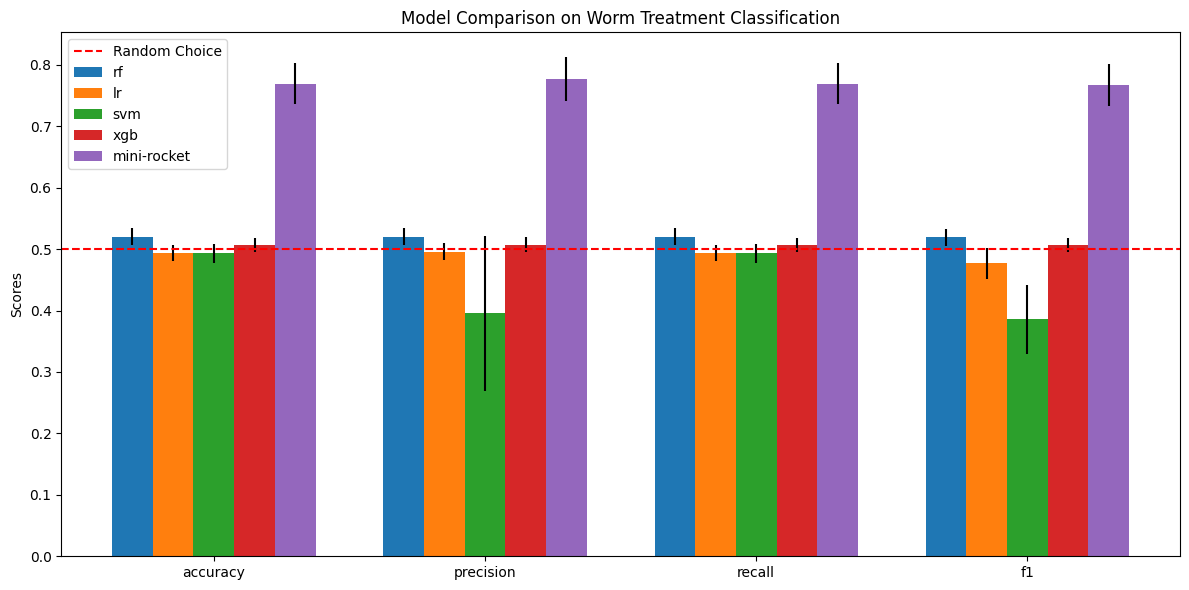

In [6]:
# Plot the the metrics mean values and std deviations as bar plots for each model
import numpy as np
import json
import matplotlib.pyplot as plt

with open("results_compare.json", "r") as f:
    results = json.load(f)

models = ["rf", "lr", "svm", "xgb"]
metrics = ["accuracy", "precision", "recall", "f1"]
mean_values = {model: [] for model in models}
std_values = {model: [] for model in models}
for model in models:
    for metric in metrics:
        mean_key = f"mean_{metric}"
        std_key = f"std_{metric}"
        mean_values[model].append(results["results"][model][mean_key])
        std_values[model].append(results["results"][model][std_key])

with open("results_rocket.json", "r") as f:
    results = json.load(f)

models.append('mini-rocket')
mean_values['mini-rocket'] = []
std_values['mini-rocket'] = []
for metric in metrics:
    mean_key = f"average_{metric}"
    std_key = f"std_{metric}"
    mean_values['mini-rocket'].append(results[mean_key])
    std_values['mini-rocket'].append(results[std_key])

# Plotting
# Plot also what results with a line we would have with a random choice(line horizontal at 0.5)
x = np.arange(len(metrics))  # the label locations
width = 0.15  # the width of the bars
fig, ax = plt.subplots(figsize=(12, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, mean_values[model], width, yerr=std_values[model], label=model)
ax.axhline(0.5, color='red', linestyle='--', label='Random Choice')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Comparison on Worm Treatment Classification')
ax.set_xticks(x + width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend() 
fig.tight_layout()
plt.savefig("model_comparison.png")
plt.show()